## Problem Statement
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

### Importing necessary libraries and train and test dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
train = pd.read_csv('C://Users//Aditya Prakash//Downloads//DSE//mysavedfiles//Black Friday//train.csv')
test = pd.read_csv('C://Users//Aditya Prakash//Downloads//DSE//mysavedfiles//Black Friday//test.csv')

In [5]:
train.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## EDA

In [6]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

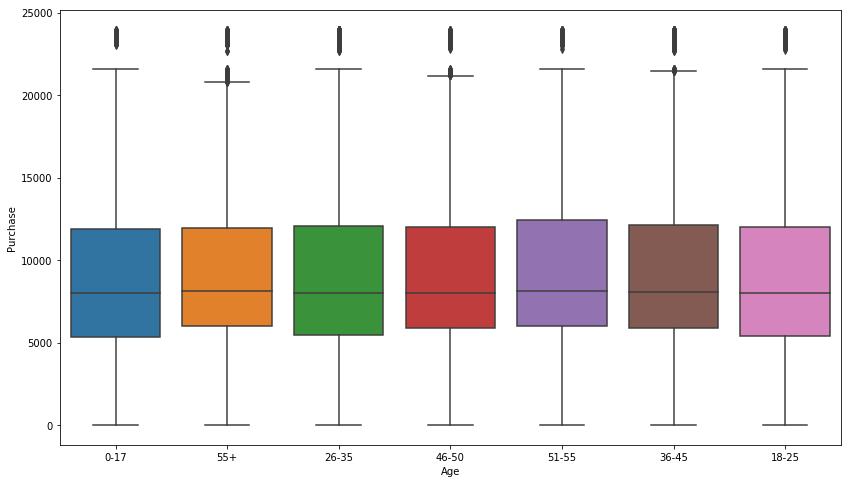

In [7]:
plt.figure(figsize=[14,8])
sns.boxplot(train.Age, train.Purchase)

In [8]:
train[train.Age=='0-17'].describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.510200e+04,15102.000000,15102.0,15102.000000,10648.000000,4873.000000,15102.000000
mean,1.002722e+06,8.761025,0.0,5.083764,9.030334,11.845885,8933.464640
std,1.776555e+03,4.500672,0.0,3.800040,5.176088,4.390692,5111.114046
min,1.000001e+06,0.000000,0.0,1.000000,2.000000,3.000000,12.000000
25%,1.001263e+06,10.000000,0.0,2.000000,4.000000,8.000000,5328.000000
50%,1.002137e+06,10.000000,0.0,5.000000,8.000000,14.000000,7986.000000
75%,1.004493e+06,10.000000,0.0,8.000000,14.000000,16.000000,11874.000000
max,1.006006e+06,19.000000,0.0,20.000000,18.000000,18.000000,23955.000000


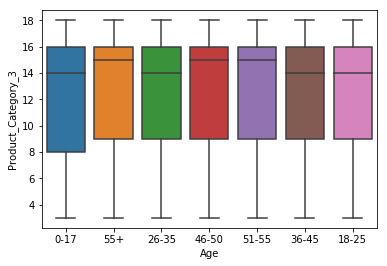

In [9]:
sns.boxplot(train.Age, train.Product_Category_3)

In [10]:
train.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [11]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
train.shape

(550068, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [14]:
train.Product_Category_3.describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [15]:
train.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

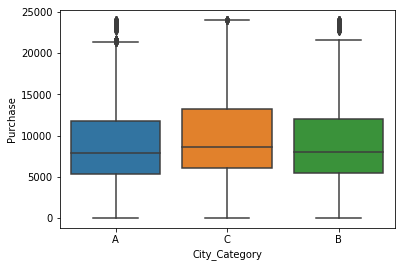

In [16]:
sns.boxplot(train.City_Category, train.Purchase)

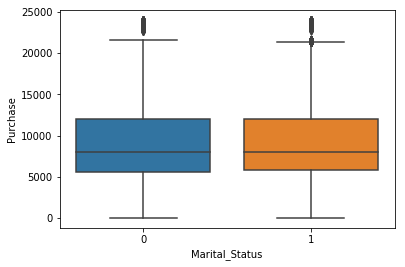

In [17]:
sns.boxplot(train.Marital_Status, train.Purchase)

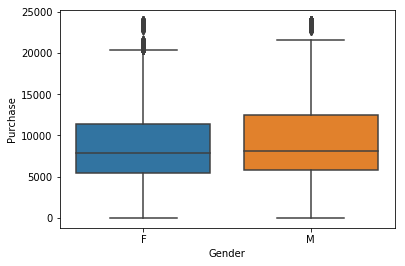

In [18]:
sns.boxplot(train.Gender, train.Purchase)

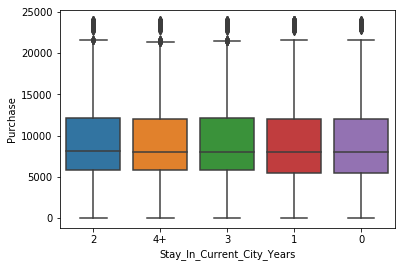

In [19]:
sns.boxplot(train.Stay_In_Current_City_Years, train.Purchase)

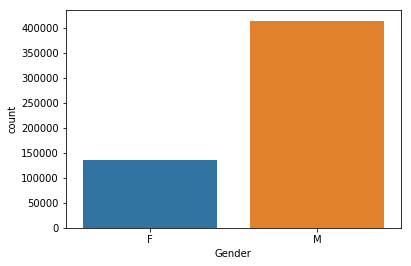

In [20]:
sns.countplot(train.Gender)

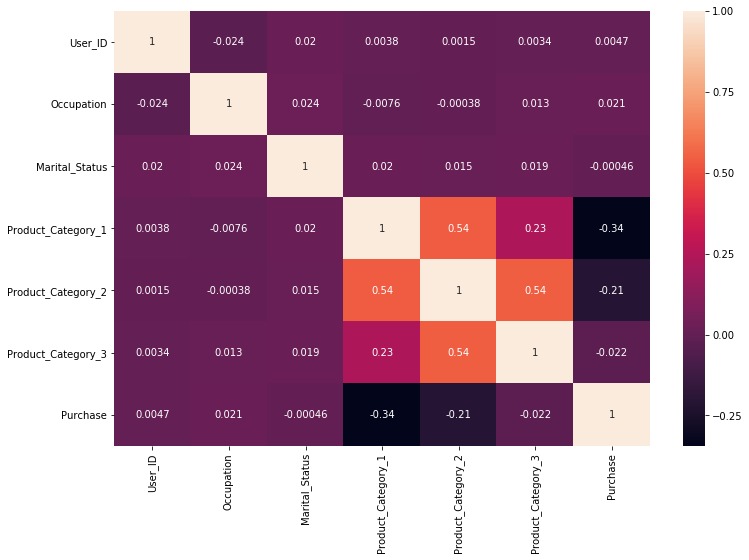

In [21]:
plt.figure(figsize=[12,8])
sns.heatmap(train.corr(), annot=True)

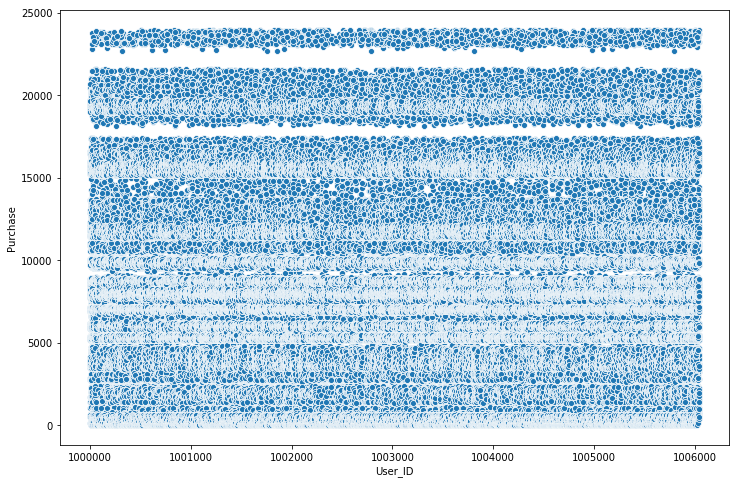

In [22]:
plt.figure(figsize=[12,8])
sns.scatterplot(train.User_ID, train.Purchase)

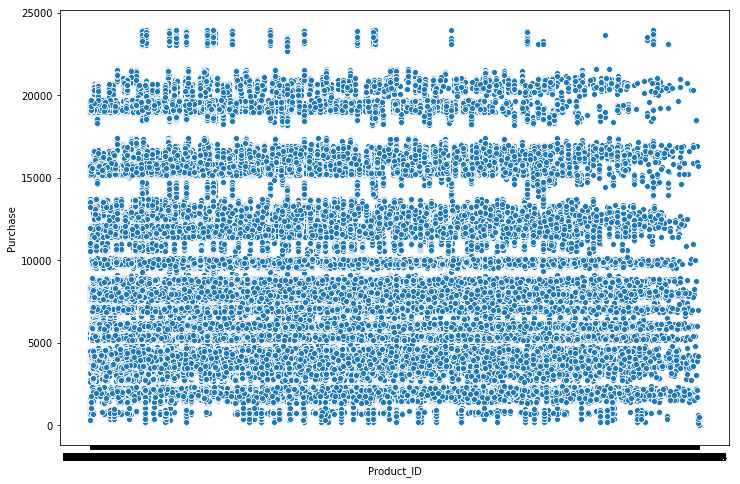

In [23]:
plt.figure(figsize=[12,8])
sns.scatterplot(train.Product_ID, train.Purchase)

In [24]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Cleaning null values

In [25]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [26]:
test.shape

(233599, 11)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [28]:
train.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [29]:
train.Product_Category_2.fillna(8.0, inplace = True)

In [30]:
test.Product_Category_2.value_counts()

8.0     27229
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: Product_Category_2, dtype: int64

In [31]:
test.Product_Category_2.fillna(8.0, inplace = True)

In [32]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [33]:
train.drop('Product_Category_3', axis = 1, inplace=True)
test.drop('Product_Category_3', axis = 1, inplace=True)

In [34]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,8.0,7871


In [35]:
train.drop(['User_ID','Product_ID'], axis = 1, inplace=True)
test.drop(['User_ID','Product_ID'], axis = 1, inplace=True)

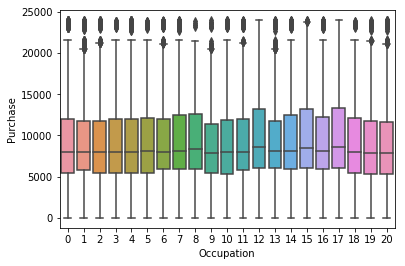

In [36]:
sns.boxplot(train.Occupation, train.Purchase)

In [37]:
train.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

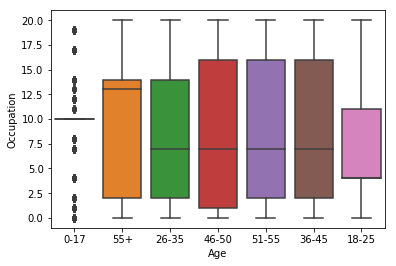

In [38]:
sns.boxplot(train.Age, train.Occupation)

In [39]:
a = pd.get_dummies(train)

In [40]:
a.shape

(550068, 22)

In [41]:
b = pd.get_dummies(test)

In [42]:
b.shape

(233599, 21)

In [43]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [44]:
x = a.drop('Purchase', axis = 1)
y = a.Purchase

In [45]:
model = lg.fit(x,y).predict(b)

In [46]:
pred = pd.DataFrame(model)

In [47]:
pred.head()

,0
0,11126.500
1,11040.625
2,8756.375
3,9394.375
4,10038.875


In [48]:
pred.to_csv('blackf.csv', index=False)

In [49]:
cd

C:\Users\Aditya Prakash


In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dt = DecisionTreeRegressor()

In [55]:
modeldt = dt.fit(x,y).predict(b)

In [64]:
solutiondt = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':modeldt})

In [65]:
solutiondt.to_csv('blackfridaydt.csv', index=False)

In [60]:
cd

C:\Users\Aditya Prakash


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [63]:
modelrf = rf.fit(x,y).predict(b)

C:\Users\Aditya Prakash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
solutionrf = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':modelrf})

In [69]:
solutionrf.to_csv('blackfridayrf.csv', index=False)

In [68]:
cd

C:\Users\Aditya Prakash


In [71]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [72]:
modelgb = gb.fit(x,y).predict(b)

In [73]:
solutiongb = pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,'Purchase':modelgb})

In [76]:
solutiongb.to_csv('blackfridaygb.csv', index=False)

In [75]:
cd

C:\Users\Aditya Prakash
